In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.iforest import IForest

Question 1.1

In [2]:
# reading in the data
df = pd.read_csv('logbook_assignment1.csv')
df.head()

# 1. Identify what percentage of date fueled entries that are not proper dates.
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
invalid_dates = df['date_fueled'].isnull().sum()
print(f'Percentage of date fueled entries that are not proper dates: {invalid_dates / len(df) * 100:.2f}%')

df.head()


/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41122/2273693357.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41122/2273693357.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41122/2273693357.py:6: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/va

Percentage of date fueled entries that are not proper dates: 11.66%


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,NaT,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [3]:
# 2. If date fueled is not entered correctly (or is not a date), and the date captured is a valid date, then fill in this value as a proxy.
# Fidn the values in the dataset where date_fueled is null and set it to the value of date_captured
df['date_fueled'] = df['date_fueled'].fillna(df['date_captured'])
df.head()

# Note: Percentage of date fueled entries that are not proper dates: 0.00%

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [4]:
# 3. Convert the column to a date format, setting any invalid date fueled entries to NaT.
# Done this already previuosly

In [5]:
#4. Remove dates that are in the future, or dates that are earlier than 2005.
df = df[(df['date_fueled'] <= datetime.now()) & (df['date_fueled'].dt.year >= 2005)]



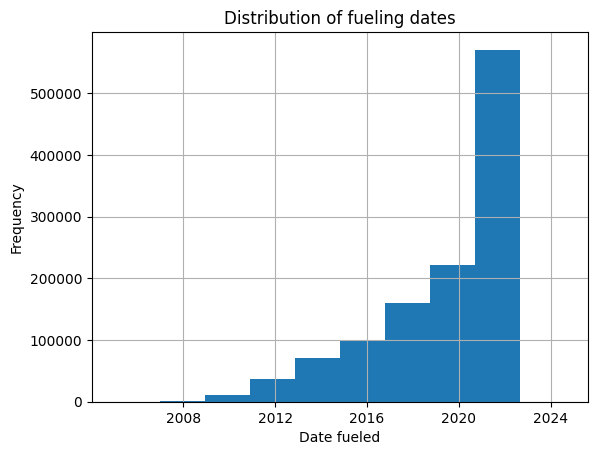

In [6]:
#5 Plot the distribution of fueling dates and comment on the results. 

df['date_fueled'].hist()
plt.xlabel('Date fueled')
plt.ylabel('Frequency')
plt.title('Distribution of fueling dates')
plt.show()

# Majority of the data is between 2021 and 2023
# Maybe people started using their services recently?
# Maybe cars more available? or just uber?
# Maybe fuel price increase, filled up less at a time, leading to more frequent fueling?


Question 1.2

In [7]:
# 1. Identify what percentage of gallons, miles, and odometer entries are missing.
df.head()
missing_gallons = df['gallons'].isnull().sum()
missing_miles = df['miles'].isnull().sum()
missing_odometer = df['odometer'].isnull().sum()
missing_mpg = df['mpg'].isnull().sum()

print(f'Percentage of missing gallons entries: {missing_gallons / len(df) * 100:.2f}%')
print(f'Percentage of missing miles entries: {missing_miles / len(df) * 100:.2f}%')
print(f'Percentage of missing odometer entries: {missing_odometer / len(df) * 100:.2f}%')
print(f'Percentage of missing mpg entries: {missing_mpg / len(df) * 100:.2f}%')

Percentage of missing gallons entries: 6.32%
Percentage of missing miles entries: 87.56%
Percentage of missing odometer entries: 12.68%
Percentage of missing mpg entries: 6.32%


In [8]:
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [9]:
#They may have used a , for thousands delimiter
df['miles'] = df['miles'].replace(',', '')
df['gallons'] = df['gallons'].replace(',', '')
df['mpg'] = df['mpg'].replace(',', '')

# This is being read in as strings, so we need to convert them to floats
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

In [10]:
# # Miles histogram
# plt.figure(figsize=(10, 6))
# df['miles'].hist(bins=20, range=(0, df['miles'].quantile(0.99)))
# plt.xlabel('Miles')
# plt.ylabel('Frequency')
# plt.title('Distribution of miles')
# plt.show()

# # Gallons histogram
# plt.figure(figsize=(10, 6))
# df['gallons'].hist(bins=20, range=(0, df['gallons'].quantile(0.99)))
# plt.xlabel('Gallons')
# plt.ylabel('Frequency')
# plt.title('Distribution of gallons')
# plt.show()

# # MPG histogram
# plt.figure(figsize=(10, 6))
# df['mpg'].hist(bins=20, range=(0, df['mpg'].quantile(0.99)))
# plt.xlabel('MPG')
# plt.ylabel('Frequency')
# plt.title('Distribution of MPG')
# plt.show()

# count = df[df['gallons'] == 0].shape[0]
# print(f'Number of values == 0 for gallons: {count}')
# count = df[df['miles'] == 0].shape[0]
# print(f'Number of values == 0 for miles: {count}')
# count = df[df['mpg'] == 0].shape[0]
# print(f'Number of values == 0 for mpg: {count}')

In [11]:

df['miles'] = df['miles'].replace(0, np.nan)
df['gallons'] = df['gallons'].replace(0, np.nan)
df['mpg'] = df['mpg'].replace(0, np.nan)

# Fill missing miles: if gallons and mpg are available, calculate miles
df.loc[df['miles'].isna() & df['gallons'].notna() & df['mpg'].notna(), 'miles'] = (
    df['gallons'] * df['mpg']
)

# Fill missing gallons: if miles and mpg are available, calculate gallons
df.loc[df['gallons'].isna() & df['miles'].notna() & df['mpg'].notna(), 'gallons'] = (
    df['miles'] / df['mpg']
)

# Fill missing mpg: if miles and gallons are available, calculate mpg
df.loc[df['mpg'].isna() & df['miles'].notna() & df['gallons'].notna(), 'mpg'] = (
    df['miles'] / df['gallons']
)

missing_gallons = df['gallons'].isnull().sum()
missing_miles = df['miles'].isnull().sum()
missing_odometer = df['odometer'].isnull().sum()
missing_mpg = df['mpg'].isnull().sum()

print(f'Percentage of missing gallons entries: {missing_gallons / len(df) * 100:.2f}%')
print(f'Percentage of missing miles entries: {missing_miles / len(df) * 100:.2f}%')
print(f'Percentage of missing odometer entries: {missing_odometer / len(df) * 100:.2f}%')
print(f'Percentage of missing mpg entries: {missing_mpg / len(df) * 100:.2f}%')

Percentage of missing gallons entries: 6.37%
Percentage of missing miles entries: 17.80%
Percentage of missing odometer entries: 12.68%
Percentage of missing mpg entries: 17.80%


In [12]:
# # 3. Convert to float
# for col in ['gallons', 'miles', 'odometer', 'mpg']:
#     df[col] = df[col].replace(',', '', regex=True)
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # 2. Calculate missing values where possible
# def calculate_mpg(row):
#     if pd.isnull(row['mpg']) and not pd.isnull(row['miles']) and not pd.isnull(row['gallons']):
#         return row['miles'] / row['gallons']
#     return row['mpg']

# def calculate_miles(row):
#     if pd.isnull(row['miles']) and not pd.isnull(row['mpg']) and not pd.isnull(row['gallons']):
#         return row['mpg'] * row['gallons']
#     return row['miles']

# def calculate_gallons(row):
#     if pd.isnull(row['gallons']) and not pd.isnull(row['miles']) and not pd.isnull(row['mpg']):
#         return row['miles'] / row['mpg']
#     return row['gallons']

# df['miles'] = df.apply(calculate_miles, axis=1)
# df['mpg'] = df.apply(calculate_mpg, axis=1)
# df['gallons'] = df.apply(calculate_gallons, axis=1)





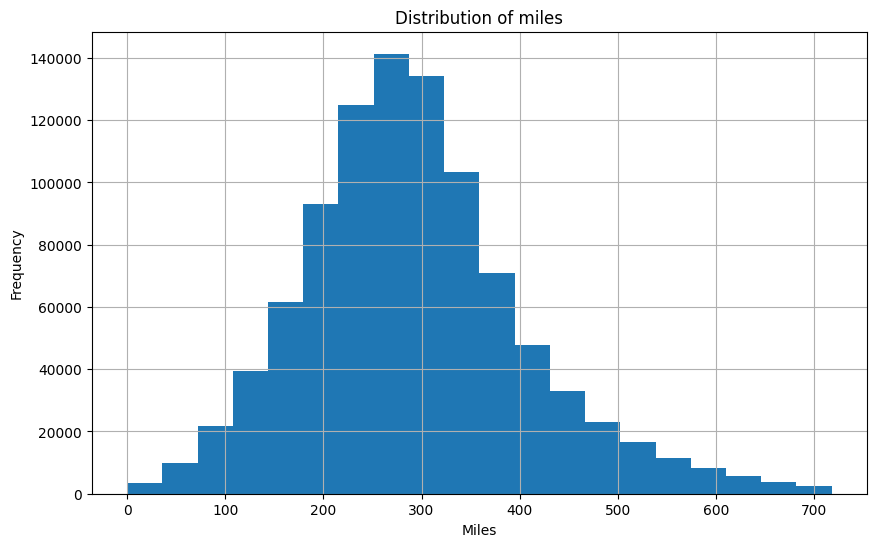

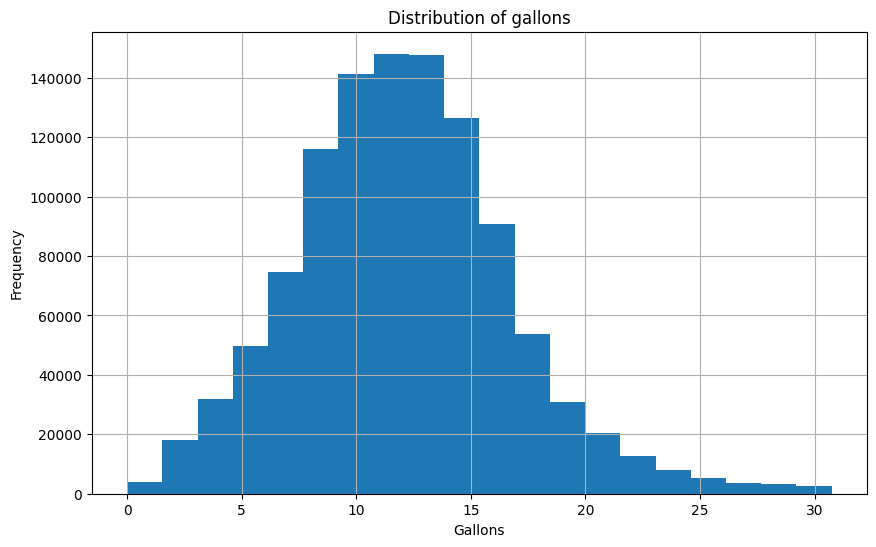

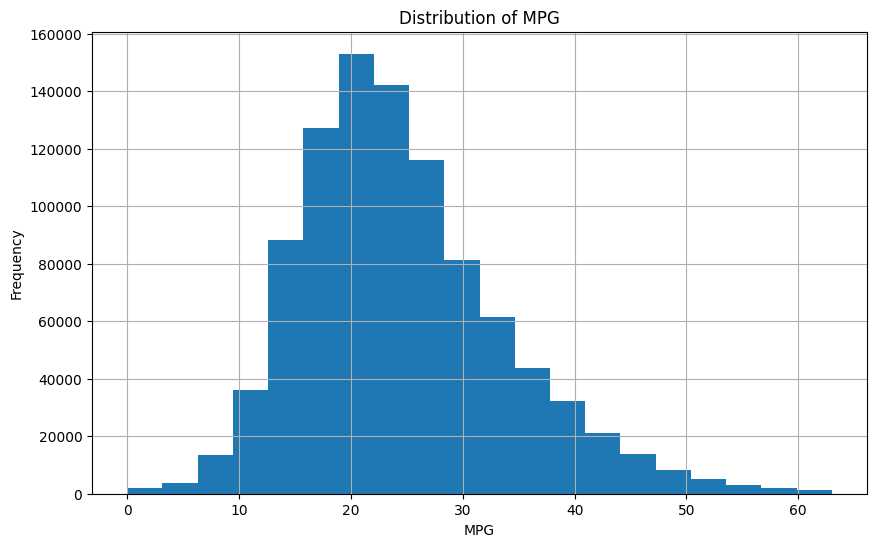

Number of values == 0 for gallons: 0
Number of values == 0 for miles: 0
Number of values == 0 for mpg: 0


In [13]:
# 4. Plot the distributions and comment on the distributions adjust the range of the x-axis to better visualize the data.

# Miles histogram
plt.figure(figsize=(10, 6))
df['miles'].hist(bins=20, range=(0, df['miles'].quantile(0.99)))
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of miles')
plt.show()

# Gallons histogram
plt.figure(figsize=(10, 6))
df['gallons'].hist(bins=20, range=(0, df['gallons'].quantile(0.99)))
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.title('Distribution of gallons')
plt.show()

# MPG histogram
plt.figure(figsize=(10, 6))
df['mpg'].hist(bins=20, range=(0, df['mpg'].quantile(0.99)))
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

count = df[df['gallons'] == 0].shape[0]
print(f'Number of values == 0 for gallons: {count}')
count = df[df['miles'] == 0].shape[0]
print(f'Number of values == 0 for miles: {count}')
count = df[df['mpg'] == 0].shape[0]
print(f'Number of values == 0 for mpg: {count}')



In [14]:
# Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles.
print(df.describe())

# Print the most frequent values for each column
print('Most frequent values:')
print(df.mode().iloc[0])



                         date_fueled       gallons            mpg  \
count                        1174132  1.099327e+06  965121.000000   
mean   2019-06-05 14:22:16.586602240  1.238793e+01      25.716999   
min              2005-01-02 00:00:00  1.000000e-03       0.018929   
25%              2017-10-17 00:00:00  8.995000e+00      18.200000   
50%              2020-08-03 00:00:00  1.195700e+01      23.300000   
75%              2021-10-26 00:00:00  1.494000e+01      29.800000   
max              2024-08-19 18:35:00  9.847100e+02  165900.000000   
std                              NaN  6.736118e+00     175.347138   

               miles  
count  965087.000000  
mean      301.467133  
min         0.100000  
25%       219.300000  
50%       283.924500  
75%       355.400000  
max     23238.400000  
std       174.070563  
Most frequent values:
date_fueled                                      2022-04-09 00:00:00
date_captured                                            Aug 31 2016
odometer   

2.


In [15]:
# 1. Create a new column with the currency. (Something to keep in mind that the Swiss Franc has a period in the abbreviation)
# Extract the curreny symbol from the 'cost_per_gallon' column and put it in a new column called 'currency'
df['currency'] = df['cost_per_gallon'].str.extract('([^\d.,\s]+|\bFr\b)')
# Where the curreency is Fr replace it with Fr.
df['currency'] = df['currency'].replace('Fr', 'Fr.')


In [16]:
# Create a new column containing the float value of the total spend and the cost per gallon. (Swiss Franc comment as above).
# Extract the float value from the 'cost_per_gallon' column and put it in a new column called 'cost_per_gallon_float'
df['cost_per_gallon_float'] = df['cost_per_gallon'].str.extract('(\d+\.\d+|\d+)')
# Convert the column to a float
df['cost_per_gallon_float'] = pd.to_numeric(df['cost_per_gallon_float'], errors='coerce')

# Extract the float value from the 'total_spend' column and put it in a new column called 'total_spend_float'
df['total_spend_float'] = df['total_spent'].str.extract('(\d+\.\d+|\d+)')
# Convert the column to a float
df['total_spend_float'] = pd.to_numeric(df['total_spend_float'], errors='coerce')


In [17]:
# Example DataFrame (assuming df['user url'] is the column with the URLs)
# Example URL: 'http://example.com/user/make/model/year/userid'

# Extract User ID: split by '/' and take the last element
df['user_id'] = df['user_url'].apply(lambda x: x.split('/')[-1] if pd.notna(x) else np.nan)

# Assuming car make, model, and year are embedded in the URL structure:
# Extract Car Make: split by '/' and take the element where 'make' is positioned
df['car_make'] = df['user_url'].apply(lambda x: x.split('/')[-4] if pd.notna(x) else np.nan)

# Extract Car Model: similarly, extract the model (assuming it's two elements before the last one)
df['car_model'] = df['user_url'].apply(lambda x: x.split('/')[-3] if pd.notna(x) else np.nan)

# Extract Car Year: extract the year (assuming it's one element before the last one)
df['car_year'] = df['user_url'].apply(lambda x: x.split('/')[-2] if pd.notna(x) else np.nan)

# Check the results
df[['user_url', 'user_id', 'car_make', 'car_model', 'car_year']].head()

,user_url,user_id,car_make,car_model,car_year
0,https://www.somewebsite.com/suzuki/swift/2015/...,674857,suzuki,swift,2015
1,https://www.somewebsite.com/bmw/x3/2009/461150,461150,bmw,x3,2009
2,https://www.somewebsite.com/mercedes-benz/e300...,133501,mercedes-benz,e300,1998
3,https://www.somewebsite.com/bmw/320d/2010/247233,247233,bmw,320d,2010
4,https://www.somewebsite.com/honda/passport/201...,1038865,honda,passport,2019


In [18]:
#The data is given in imperial units, and in SA, we use proper measurement standards.
# 1. litres filled: use the gallons - consider whether to use UK or US gallons

# Convert gallons to litres (assuming US gallons)
df['litres_filled'] = df['gallons'] * 3.78541

# Convert miles to kilometers
df['km_driven'] = df['miles'] * 1.60934

# Calculate litres per 100 kilometers
df['litres_per_100km'] = (df['litres_filled'] / df['km_driven']) * 100

# Display the new columns to check the result
df[['gallons', 'litres_filled', 'miles', 'km_driven', 'litres_per_100km']].head()

,gallons,litres_filled,miles,km_driven,litres_per_100km
0,NaN,NaN,NaN,NaN,NaN
1,12.120,45.879169,382.9920,616.364345,7.443514
2,7.991,30.249211,227.7435,366.516724,8.253160
3,10.575,40.030711,494.9100,796.478459,5.025963
4,11.651,44.103812,244.4000,393.322696,11.213137


Question 3

Number of Unique Users per Currency (Proxy for Country):
currency
$      78560
$U        56
AED       77
ALL        7
AMD        9
       ...  
€       6717
₮          6
₱        479
₲         35
₴        103
Name: user_id, Length: 120, dtype: int64


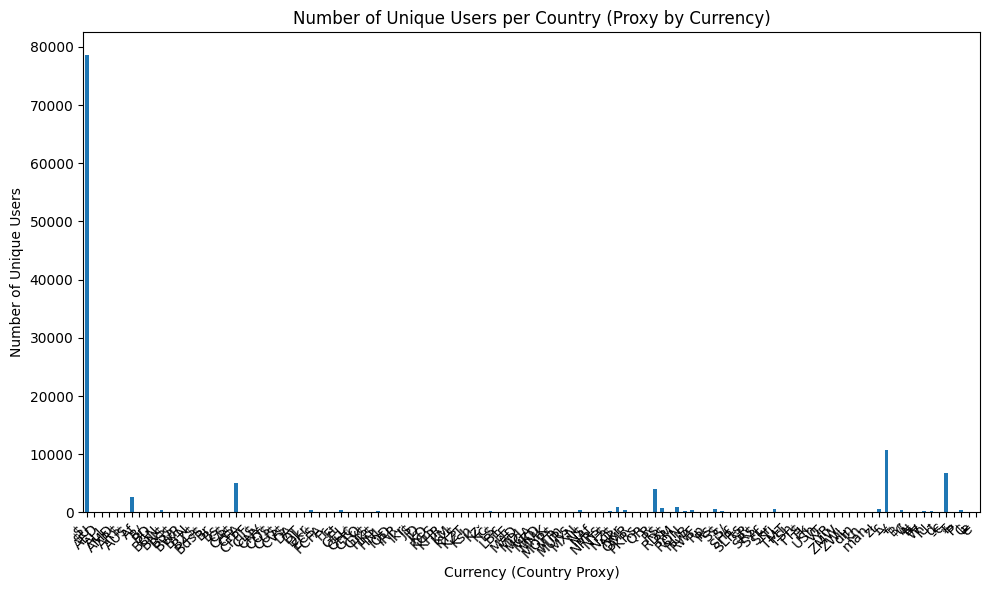

In [19]:
# 1

# Group by currency and count unique users
unique_users_per_currency = df.groupby('currency')['user_id'].nunique()

# Print a text version
print("Number of Unique Users per Currency (Proxy for Country):")
print(unique_users_per_currency)

# Plotting the result
plt.figure(figsize=(10, 6))
unique_users_per_currency.plot(kind='bar')

plt.title('Number of Unique Users per Country (Proxy by Currency)')
plt.xlabel('Currency (Country Proxy)')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Number of Unique Users per Day:
date_captured
2008-08-07      3
2008-08-08     11
2008-08-09      5
2008-08-10      1
2008-08-11      4
             ... 
2022-04-12    637
2022-04-13    736
2022-04-14    984
2022-04-15    598
2022-04-16     40
Name: user_id, Length: 4999, dtype: int64


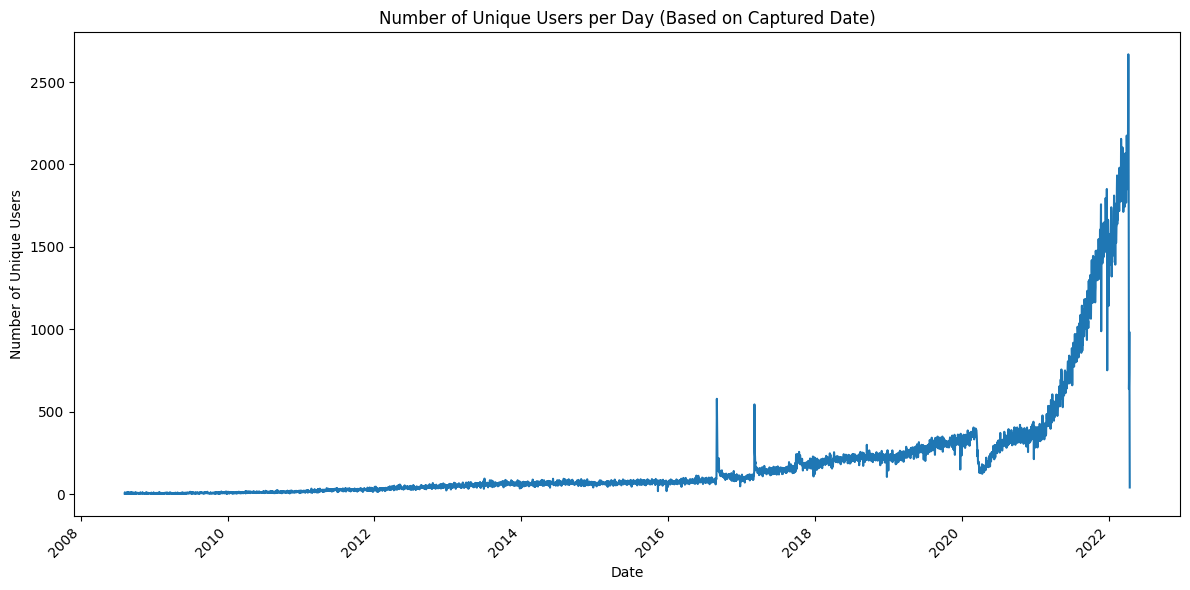

In [20]:
# 2

# Step 1: Convert the date column to datetime format and handle invalid dates
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')

# Step 2: Group by date and count unique users
unique_users_per_day = df.groupby('date_captured')['user_id'].nunique()

# Print the text version of unique users per day
print("Number of Unique Users per Day:")
print(unique_users_per_day)

# Step 3: Plot the result
plt.figure(figsize=(12, 6))
unique_users_per_day.plot(kind='line')

plt.title('Number of Unique Users per Day (Based on Captured Date)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
# 3

# Step 1: Convert the 'date_fueled' to datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Step 2: Convert 'car_year' to numeric (handling errors)
df['car_year'] = pd.to_numeric(df['car_year'], errors='coerce')

# Step 3: Calculate the vehicle age at the time of refueling
df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']

# Step 4: Remove invalid ages (e.g., negative ages if data is wrong)
df = df[df['vehicle_age'] >= 0]

# Step 5: Group by country (using currency as a proxy) and summarize
summary_by_country = df.groupby('currency')['vehicle_age'].describe()

# Print the summary statistics for each country
print("Vehicle Age Summary Statistics by Country (Proxy by Currency):")
print(summary_by_country)

Vehicle Age Summary Statistics by Country (Proxy by Currency):
             count       mean        std   min   25%   50%   75%     max
currency                                                                
$         735419.0  11.468689  11.888176   0.0   5.0  10.0  16.0  1809.0
$U           528.0  12.988636  11.512054   0.0   4.0  11.0  19.0    57.0
AED          685.0   7.769343   5.713884   0.0   3.0   7.0  11.0    31.0
ALL           67.0  14.194030   3.153828   8.0  12.0  15.0  18.0    18.0
AMD           85.0  15.458824   2.096215  13.0  14.0  15.0  17.0    25.0
...            ...        ...        ...   ...   ...   ...   ...     ...
€          58243.0  11.188211   7.195477   0.0   6.0  10.0  15.0    69.0
₮             44.0   9.431818   5.022728   2.0   4.0  10.0  13.0    22.0
₱           4160.0   8.623077   6.242764   0.0   4.0   7.0  12.0    54.0
₲            299.0  13.190635   7.734290   1.0   7.0  13.0  21.0    26.0
₴            980.0  10.548980   6.232690   0.0   6.0  10.0  1

In [22]:
# 4

# Step 1: Group by car make and model, and count the occurrences
popular_cars = df.groupby(['car_make', 'car_model']).size().reset_index(name='counts')

# Step 2: Sort by count in descending order
popular_cars = popular_cars.sort_values(by='counts', ascending=False)

# Step 3: Display the top N most popular makes and models
top_n = 10  # You can adjust this number as needed
print(f"Top {top_n} Most Popular Makes and Models:")
print(popular_cars.head(top_n))

Top 10 Most Popular Makes and Models:
     car_make     car_model  counts
689     honda         civic    8001
1899   toyota       4runner    7758
1933   toyota       corolla    7694
564      ford         f-150    7644
673     honda        accord    7583
625      ford       mustang    7506
639      ford        ranger    7405
1974   toyota  land_cruiser    7372
1925   toyota         camry    7311
885      jeep      wrangler    7022


Question 4

In [23]:
# Step 1: Group by currency and count the number of transactions
currency_counts = df['currency'].value_counts()

# Step 2: Select the top 5 currencies
top_5_currencies = currency_counts.head(5)

# Print the top 5 currencies and their transaction counts
print("Top 5 Currencies by Number of Transactions:")
print(top_5_currencies)

Top 5 Currencies by Number of Transactions:
currency
$      735419
£       86125
€       58243
CA$     46114
R       35974
Name: count, dtype: int64


In [24]:
# Step 1: Get the original dataset size before removing outliers
original_size = df.shape[0]

# Filter the Data for the Top 5 Currencies
top_5_currencies = ['$','£','€','CA$','R']
df_top_5 = df[df['currency'].isin(top_5_currencies)]

# Create a boolean mask to track the rows to keep
mask = pd.Series([True] * df.shape[0], index=df.index)

# Loop through each currency and apply PyOD's Isolation Forest
for currency in top_5_currencies:
    currency_data = df_top_5[df_top_5['currency'] == currency]
    
    # Prepare the data for PyOD (convert to NumPy array to remove feature names)
    X = currency_data[['gallons', 'litres_filled', 'miles', 'km_driven', 'litres_per_100km', 'cost_per_gallon_float', 'total_spend_float']].fillna(0).values
    
    # Initialize and fit the Isolation Forest model
    clf = IForest(contamination=0.05)  # Adjust contamination as needed
    clf.fit(X)
    
    # Predict outliers
    outlier_predictions = clf.predict(X)  # 0 = inlier, 1 = outlier
    
    # Update the mask using boolean indexing
    mask.loc[currency_data.index] = outlier_predictions == 0

# Apply the mask to the original DataFrame to remove outliers
df_cleaned = df[mask]

# Step 2: Get the cleaned dataset size after removing outliers
cleaned_size = df_cleaned.shape[0]

# Step 3: Calculate the number of removed values
removed_values = original_size - cleaned_size

# Print the result
print("Number of values removed after accounting for outliers:", removed_values)

# If you want to replace the original df with the cleaned data:
df = df_cleaned


Number of values removed after accounting for outliers: 48096


https://www.oanda.com/currency-converter/

In [28]:
# Step 1: Convert the 'date_fueled' column to datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Step 2: Filter the data for January 2022 and create a copy to avoid SettingWithCopyWarning
df_jan_2022 = df[(df['date_fueled'].dt.year == 2022) & (df['date_fueled'].dt.month == 1)].copy()

# Step 3: Filter for only the top 5 currencies
top_5_currencies = ['$','£','€','CA$','R']
df_jan_2022_top_5 = df_jan_2022[df_jan_2022['currency'].isin(top_5_currencies)].copy()

# Step 4: Convert gallons to litres and cost per gallon to cost per litre
# 1 gallon = 3.78541 litres
df_jan_2022_top_5.loc[:, 'cost_per_litre'] = df_jan_2022_top_5['cost_per_gallon_float'] / 3.78541

# Define the currency conversion rates to ZAR
currency_conversion_rates = {
    '$': 15.3687,   # USD to ZAR
    '£': 21.0599,   # GBP to ZAR
    '€': 17.5877,   # EUR to ZAR
    'CA$': 12.2734, # CAD to ZAR
    'R': 1.0        # ZAR (already in ZAR)
}

# Step 5: Convert 'cost_per_litre' to ZAR based on the 'currency'
df_jan_2022_top_5.loc[:, 'cost_per_litre_zar'] = df_jan_2022_top_5.apply(
    lambda row: row['cost_per_litre'] * currency_conversion_rates.get(row['currency'], 1),
    axis=1
)

# Step 6: Group by currency and calculate the average cost per litre in ZAR
avg_cost_per_litre_per_country = df_jan_2022_top_5.groupby('currency')['cost_per_litre_zar'].mean()

# Display the results
print("Average Cost per Litre in ZAR for January 2022 (Top 5 Currencies):")
print(avg_cost_per_litre_per_country)

Average Cost per Litre in ZAR for January 2022 (Top 5 Currencies):
currency
$      17.462744
CA$    19.179858
R      18.830700
£      30.865495
€      27.857063
Name: cost_per_litre_zar, dtype: float64


### Analysis of Fuel Prices in ZAR for January 2022 (Top 5 Currencies)

Here is a breakdown of the average cost per litre in ZAR for January 2022:

1. **United States (USD)**: 17.46 ZAR
2. **Canada (CAD)**: 19.18 ZAR
3. **South Africa (ZAR)**: 18.83 ZAR
4. **United Kingdom (GBP)**: 30.87 ZAR
5. **Eurozone (EUR)**: 27.86 ZAR

### Notable Differences and Potential Reasons

1. **United States (USD: 17.46 ZAR)**
   - **Lower Fuel Prices**: The average cost per litre in the US is the lowest among the top 5 currencies. This is consistent with the United States having generally lower fuel prices due to several factors:
     - **Lower Taxes**: The US imposes lower fuel taxes compared to European countries.
     - **Domestic Oil Production**: The US is a significant producer of oil, which reduces the cost of importing fuel. The country has access to domestic resources that help keep prices down.
     - **Economies of Scale**: High demand and efficient distribution networks across the US also help keep fuel prices relatively low.

2. **Canada (CAD: 19.18 ZAR)**
   - **Moderate Fuel Prices**: Canada’s average cost per litre is slightly higher than the US but still moderate compared to the UK and Eurozone.
     - **Provincial Differences**: Fuel prices in Canada can vary significantly between provinces due to differing taxes and environmental policies.
     - **Domestic Production**: Like the US, Canada has significant domestic oil production, which helps keep prices from rising too high. However, certain regions might experience higher prices due to transportation costs or regional taxes.

3. **South Africa (ZAR: 18.83 ZAR)**
   - **Comparable to Canada**: South Africa's average cost per litre is similar to Canada’s. This is expected due to several factors:
     - **Import Costs**: South Africa imports most of its oil, so fluctuations in international oil prices and exchange rates directly impact fuel prices.
     - **Government Levies**: South Africa has significant government taxes and levies that are added to the base fuel price, contributing to the relatively high price.
     - **Exchange Rate Volatility**: The strength of the Rand against the US Dollar can heavily influence fuel prices.

4. **United Kingdom (GBP: 30.87 ZAR)**
   - **Significantly Higher Fuel Prices**: The UK has the highest average cost per litre among the top 5 currencies. This is consistent with known factors:
     - **High Fuel Taxes**: The UK imposes substantial taxes on fuel, which makes prices significantly higher than in North America.
     - **Environmental Policies**: The UK’s push toward reducing carbon emissions has led to policies that can increase fuel costs.
     - **Import Dependency**: Despite some North Sea oil production, the UK imports a significant portion of its fuel, making it vulnerable to global oil price fluctuations.

5. **Eurozone (EUR: 27.86 ZAR)**
   - **High Fuel Prices**: The Eurozone also experiences high fuel prices, though slightly lower than the UK:
     - **Fuel Taxes**: Many European countries have high fuel taxes aimed at reducing carbon emissions and funding public infrastructure.
     - **Import Dependency**: Most Eurozone countries rely heavily on imported oil, making them susceptible to international price fluctuations.
     - **Green Energy Transition**: Some European countries are transitioning towards green energy, and fuel taxes are used as a means to incentivize a shift away from fossil fuels.

### Summary of Differences:
- **The United States and Canada** have relatively lower fuel prices compared to European countries and South Africa. This is largely due to lower taxes, greater domestic oil production, and more efficient distribution networks.
- **The UK and Eurozone** have significantly higher fuel prices, primarily due to higher taxes, import dependencies, and environmental policies aimed at reducing carbon emissions.
- **South Africa** falls somewhere in between, with prices comparable to Canada but influenced by import costs, government levies, and exchange rate fluctuations.

### Conclusion:
The notable differences in fuel prices across these countries are largely driven by government taxation policies, domestic production capacities, and environmental regulations. Countries that impose higher taxes on fuel, such as the UK and those in the Eurozone, see significantly higher prices compared to countries like the US and Canada, where taxes are lower and domestic production is higher.

If you need further details or want to dive deeper into specific aspects of the analysis, feel free to ask!

In [31]:
# Step 1: Convert the 'odometer' column to numeric (handling any errors)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# Step 2: Sort the data by 'user_id' and 'date_fueled'
df_sorted = df.sort_values(by=['user_id', 'date_fueled']).copy()

# Step 3: Calculate the change in odometer readings for each user
df_sorted['odometer_diff'] = df_sorted.groupby('user_id')['odometer'].diff()

# Step 4: Identify potential missed fill-ups where the odometer_diff exceeds the miles driven by a significant margin
# Define a threshold (e.g., 50% higher than the miles driven)
threshold_factor = 1.5
df_sorted['missed_fillup'] = df_sorted['odometer_diff'] > (df_sorted['miles'] * threshold_factor)

# Step 5: Count the number of suspected missed fill-ups
missed_fillups_count = df_sorted['missed_fillup'].sum()

# Display the result
print(f"Estimated number of missed fill-ups in the dataset: {missed_fillups_count}")

# Optional: Display some examples of missed fill-ups
missed_fillup_examples = df_sorted[df_sorted['missed_fillup'] == True][['user_id', 'date_fueled', 'odometer', 'odometer_diff', 'miles']]
print("Examples of suspected missed fill-ups:")
print(missed_fillup_examples.head())

Estimated number of missed fill-ups in the dataset: 522
Examples of suspected missed fill-ups:
        user_id date_fueled  odometer  odometer_diff     miles
831897  1002547  2020-05-21     944.0          486.0  222.7084
74673   1005106  2020-11-06     775.0          350.0  220.7675
821993  1006874  2020-06-13     671.0          659.0  368.0756
853068  1008102  2020-07-31     299.0          230.0  148.7456
879012  1008609  2020-07-31     811.0          506.0  301.3483


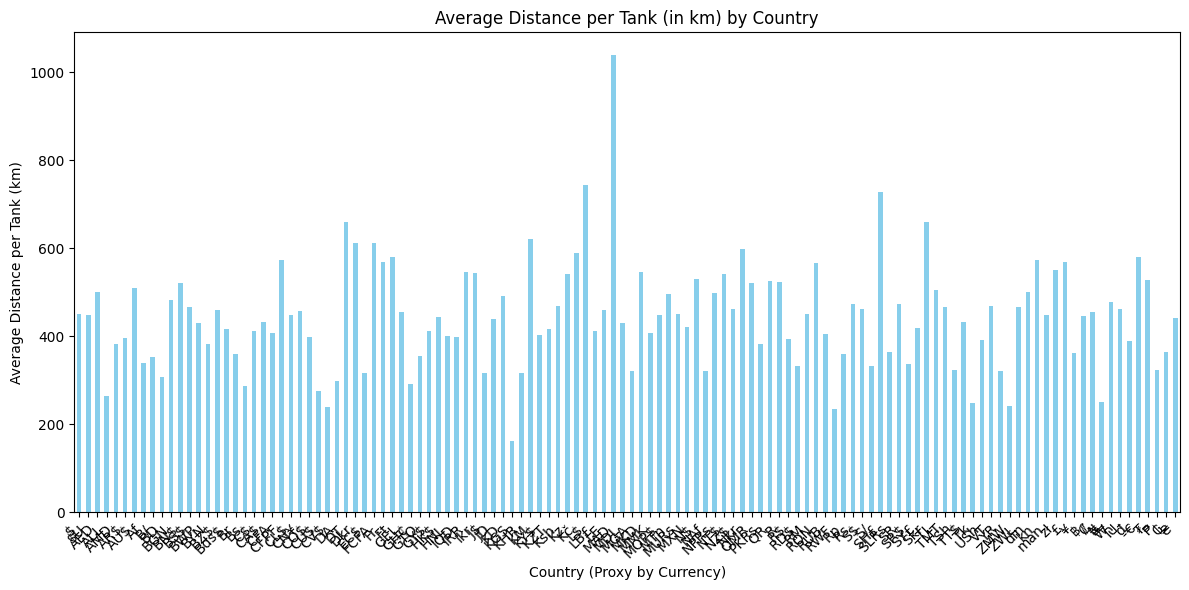

The country with the largest average distance per tank is MAD with an average distance of 1039.02 km.


In [32]:
# Step 1: Convert miles to kilometers if necessary
df['km_driven'] = df['miles'] * 1.60934

# Step 2: Group by currency (as a proxy for country) and calculate the average distance per tank
average_distance_per_country = df.groupby('currency')['km_driven'].mean()

# Step 3: Plot the results
plt.figure(figsize=(12, 6))
average_distance_per_country.plot(kind='bar', color='skyblue')

plt.title('Average Distance per Tank (in km) by Country')
plt.xlabel('Country (Proxy by Currency)')
plt.ylabel('Average Distance per Tank (km)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 4: Identify the country with the largest average distance
max_distance_country = average_distance_per_country.idxmax()
max_distance_value = average_distance_per_country.max()

print(f"The country with the largest average distance per tank is {max_distance_country} with an average distance of {max_distance_value:.2f} km.")

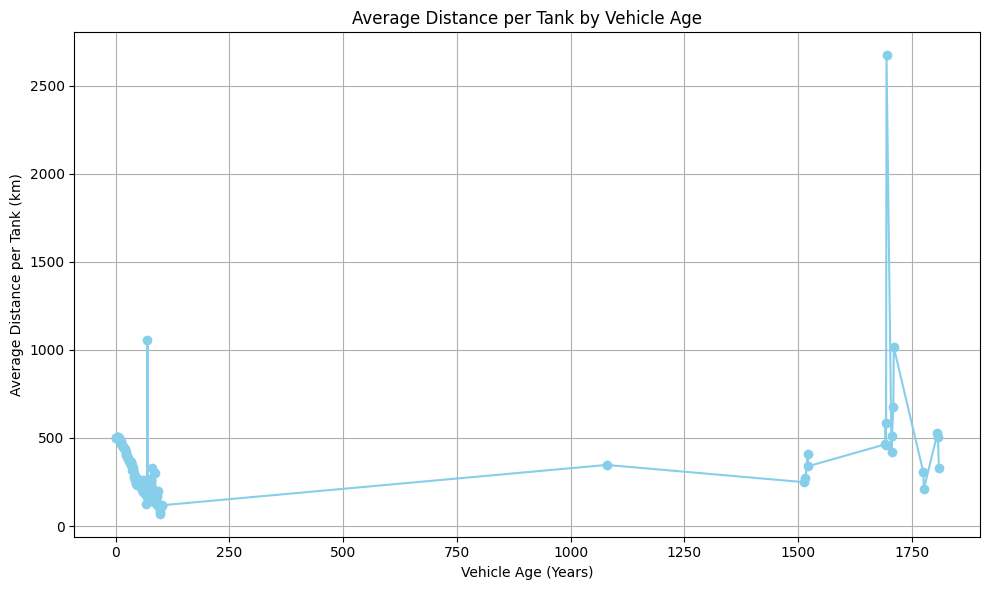

In [37]:
df['km_driven'] = df['miles'] * 1.60934

# Step 4: Group by vehicle age and calculate the average distance per tank
average_distance_by_age = df.groupby('vehicle_age')['km_driven'].mean()

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(average_distance_by_age.index, average_distance_by_age.values, marker='o', linestyle='-', color='skyblue')

plt.title('Average Distance per Tank by Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Average Distance per Tank (km)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Step 1: Filter the data for South Africa (currency set to 'R')
df_sa = df[df['currency'] == 'R'].copy()

# Step 2: Identify the top 5 most popular vehicles in South Africa
top_5_vehicles = df_sa.groupby(['car_make', 'car_model']).size().reset_index(name='counts')
top_5_vehicles = top_5_vehicles.sort_values(by='counts', ascending=False).head(5)

# Step 3: Filter the data to include only the top 5 most popular vehicles
top_5_vehicle_names = top_5_vehicles[['car_make', 'car_model']].apply(tuple, axis=1)
df_top_5_sa = df_sa[df_sa[['car_make', 'car_model']].apply(tuple, axis=1).isin(top_5_vehicle_names)].copy()

# Step 4: Compute the fuel efficiency (litres per 100 km) using .loc[] to avoid SettingWithCopyWarning
df_top_5_sa.loc[:, 'fuel_efficiency_l_per_100km'] = (df_top_5_sa['litres_filled'] / df_top_5_sa['km_driven']) * 100

# Step 5: Calculate the average fuel efficiency for each of the top 5 vehicles
avg_fuel_efficiency = df_top_5_sa.groupby(['car_make', 'car_model'])['fuel_efficiency_l_per_100km'].mean()

# Display the results
print("Average Fuel Efficiency (litres per 100 km) for the Top 5 Most Popular Vehicles in SA:")
print(avg_fuel_efficiency)

# Step 6: Analyze the results
for vehicle, efficiency in avg_fuel_efficiency.items():
    print(f"Vehicle: {vehicle}, Fuel Efficiency: {efficiency:.2f} L/100km")
    if efficiency < 5:
        print(f"  This seems unusually low, indicating very high fuel efficiency or possible data errors.")
    elif efficiency > 20:
        print(f"  This seems unusually high, indicating poor fuel efficiency or possible data errors.")
    else:
        print(f"  This is within the expected range for typical vehicles.")

Average Fuel Efficiency (litres per 100 km) for the Top 5 Most Popular Vehicles in SA:
car_make    car_model
mitsubishi  pajero       12.932672
suzuki      jimny         9.155169
toyota      fortuner     11.398253
            hilux        12.184579
volkswagen  polo          7.818371
Name: fuel_efficiency_l_per_100km, dtype: float64
Vehicle: ('mitsubishi', 'pajero'), Fuel Efficiency: 12.93 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('suzuki', 'jimny'), Fuel Efficiency: 9.16 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('toyota', 'fortuner'), Fuel Efficiency: 11.40 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('toyota', 'hilux'), Fuel Efficiency: 12.18 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('volkswagen', 'polo'), Fuel Efficiency: 7.82 L/100km
  This is within the expected range for typical vehicles.


Mitsubishi Pajero: 12.93 L/100km - This is within the expected range for an SUV, which typically consumes more fuel due to its larger engine and weight.

Suzuki Jimny: 9.16 L/100km - This is a realistic figure for a compact off-road vehicle, which balances fuel efficiency with off-road capability.

Toyota Fortuner: 11.40 L/100km - This is expected for a large SUV that prioritizes power and capability.

Toyota Hilux: 12.18 L/100km - The Hilux, a popular pickup, has a fuel consumption that aligns with similar vehicles in its class.

Volkswagen Polo: 7.82 L/100km - The Polo, being a small and efficient hatchback, shows good fuel efficiency, as expected.

In [40]:
# Step 1: Calculate the fuel efficiency (litres per 100 km)
df['fuel_efficiency_l_per_100km'] = (df['litres_filled'] / df['km_driven']) * 100

# Step 2: Filter out unrealistic fuel efficiency values (e.g., less than 2 L/100 km or more than 30 L/100 km)
df_filtered = df[(df['fuel_efficiency_l_per_100km'] >= 2) & (df['fuel_efficiency_l_per_100km'] <= 30)]

# Step 3: Group by country (currency), car_make, and car_model, and calculate the average fuel efficiency
avg_fuel_efficiency_per_vehicle = df_filtered.groupby(['currency', 'car_make', 'car_model'])['fuel_efficiency_l_per_100km'].mean().reset_index()

# Step 4: Identify the most fuel-efficient vehicle in each country
most_fuel_efficient_per_country = avg_fuel_efficiency_per_vehicle.loc[avg_fuel_efficiency_per_vehicle.groupby('currency')['fuel_efficiency_l_per_100km'].idxmin()]

# Step 5: Display the most fuel-efficient vehicles in each country
print("Most Fuel-Efficient Vehicles in Each Country:")
print(most_fuel_efficient_per_country)

# Step 6: Sanity check (You can perform an online check for realistic values)
for index, row in most_fuel_efficient_per_country.iterrows():
    print(f"Country: {row['currency']}, Vehicle: {row['car_make']} {row['car_model']}, Fuel Efficiency: {row['fuel_efficiency_l_per_100km']:.2f} L/100km")
    if row['fuel_efficiency_l_per_100km'] < 5:
        print(f"  This is very efficient and typical for hybrid or small vehicles.")
    elif row['fuel_efficiency_l_per_100km'] > 20:
        print(f"  This seems high for a regular vehicle, likely a large truck or SUV.")

Most Fuel-Efficient Vehicles in Each Country:
      currency       car_make         car_model  fuel_efficiency_l_per_100km
905          $  mercedes-benz  b_electric_drive                     2.577396
1671        $U         toyota             prius                     4.868771
1719       AED         nissan           x-trail                     6.843688
1736       ALL  mercedes-benz              c220                     7.023537
1742       AMD           ford            fusion                     7.356590
...        ...            ...               ...                          ...
10098        €         toyota     prius_plug-in                     3.698984
10199        ₮           fiat             panda                     4.991288
10224        ₱          honda                mc                     2.417072
10357        ₲         toyota           starlet                     6.013372
10409        ₴        peugeot           partner                     5.144121

[120 rows x 4 columns]
Countr